# Exercise 2.1 – Numerical simulation of the SIR model and its properties


\begin{split}\begin{aligned}
\frac{dS}{dt} & = - \beta I S\\
\frac{dI}{dt} & = \beta I S - \mu I\\
\frac{dR}{dt} & = \mu I
\end{aligned}\end{split}

The infectious rate 𝛽 controls the rate of spread which represents the probability of transmitting disease between a susceptible and an infectious individual. The recovery rate 𝛾 = 1/D, is determined by the average duration (D), of infection. Enabling vital dynamics (births and deaths) can sustain an epidemic or allow new introductions to spread because new births provide more susceptible individuals. In this model, we will consider zero birth and dead rates, thus the total population will remain constant.

Source: https://docs.idmod.org/projects/emod-hiv/en/2.20_a/model-seir.html#seir-model

### Exercises
1. Implement and simulate the differential equations (use numerical methods
for ODE)

In [1]:
import numpy as np

# Define SIR differential equations
def mySIR(t, sir, beta, mu):
	
	s, i, r = sir
	
	dsdt = - beta*i*s                  	# dS/dt
	didt = beta*s*i - mu*i				# dI/dt
	drdt = i*mu                      	# dR/dt
	
	return np.array([dsdt, didt, drdt])


In [2]:
# Define SIR initial values and fixed parameters

sir_0 = [0.998, 0.002, 0]   # Initial SIR conditions

recov = 5                       # Recovery period (days)
beta = 0.5                      # Transmission rate
mu = 1/recov                    # Recovery rate

interval = [0, 200]             # Days
timesteps = 200

Text(0.5, 0, 'Time (days)')

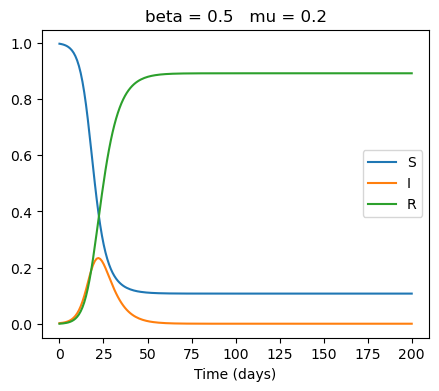

In [3]:
from scipy.integrate import *
import matplotlib.pyplot as plt
'''
Function solve_ivp numerically integrates a system of ordinary differential equations given an initial value.
Standar integration is performed by the Explicit Runge-Kutta method of order 5(4).
'''
# fun attribute should be an array containing the coefficients of the differential equation.
sir_int = solve_ivp(fun = mySIR, t_span = interval, y0 = sir_0, args = (beta, mu), t_eval = np.linspace(interval[0],interval[1], timesteps))
sir_int.y

# Plot the curves
fig, ax = plt.subplots(dpi = 100, figsize = (5,4))
curves = ax.plot(sir_int.t, sir_int.y.T)
ax.legend(curves, ['S', 'I', 'R'])
ax.set_title("beta = {}   mu = {}".format(beta, mu))
ax.set_xlabel("Time (days)")

2. Which parameters define the time scale in the system (about a year)? Play
with them to find out how it changes.
Hint: Define the end of the epidemic at a certain threshold for the infected
population; separate cases above and below the epidemic threshold.

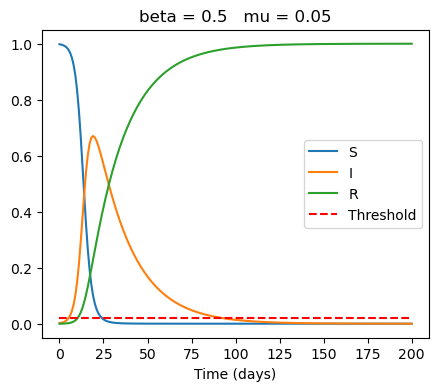

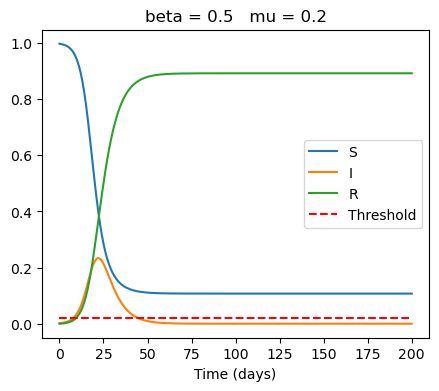

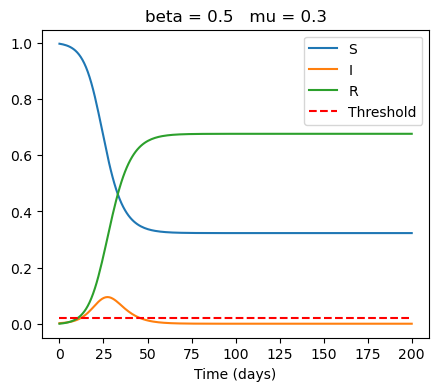

In [41]:
beta = 0.5
mu_list = [0.05, 0.2, 0.3]

for mu in mu_list:
    sir_int = solve_ivp(fun = mySIR, t_span = interval, y0 = sir_0, args = (beta, mu), t_eval = np.linspace(interval[0],interval[1], timesteps))

    # Plot the curves
    fig, ax = plt.subplots(dpi = 100, figsize = (5,4))
    curves = ax.plot(sir_int.t, sir_int.y.T, label = ['S', 'I', 'R'])

    # Plot epidemic threshold
    threshold = ax.plot(sir_int.t, [0.02]*len(sir_int.t), "r--", label = "Threshold")
    ax.set_title("beta = {}   mu = {}".format(beta, mu))
    ax.set_xlabel("Time (days)")
    ax.legend()


Recovery rate (mu) variations strongly regulates the amplitue of Infective cases curve, the lower the recovery rate, the higher the amplitude. This occurs because when mu is low, infective people remain infective for a longer period, thus producing new infections.

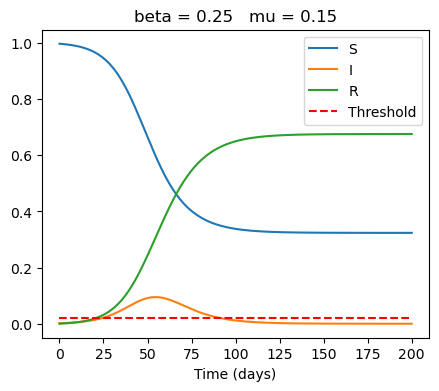

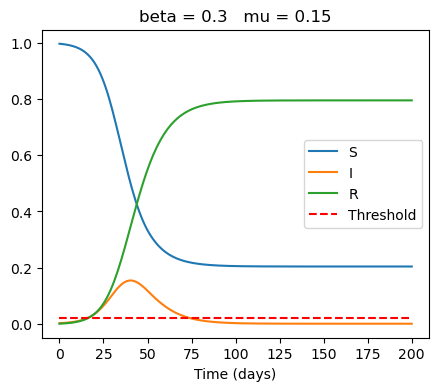

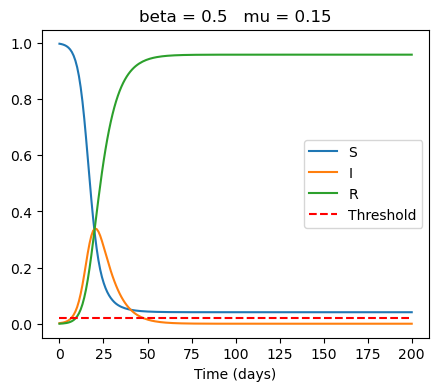

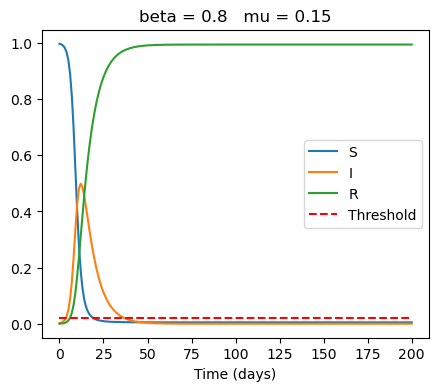

In [42]:
mu = 0.15
b_list = [0.25, 0.3, 0.5, 0.8]

for beta in b_list:
    sir_int = solve_ivp(fun = mySIR, t_span = interval, y0 = sir_0, args = (beta, mu), t_eval = np.linspace(interval[0],interval[1], timesteps))

    # Plot the curves
    fig, ax = plt.subplots(dpi = 100, figsize = (5,4))
    curves = ax.plot(sir_int.t, sir_int.y.T, label = ['S', 'I', 'R'])

    # Plot epidemic threshold
    threshold = ax.plot(sir_int.t, [0.02]*len(sir_int.t), "r--", label = "Threshold")
    ax.legend()
    ax.set_title("beta = {}   mu = {}".format(beta, mu))
    ax.set_xlabel("Time (days)")

Transmission rate (beta) regulates mainly the velocity at which Infective compartment grows, what makes the curve wider or narrower and defines the time scale of the epidemic. Low beta values produce a slowly-growing and long-lasting Infective curve, while high values produce a punctual narrow peak.

3. Fix parameters above the epidemic threshold and change the initial
conditions. Can you find endemic states? Plot the phase space of the
variables (S,I) for several initial conditions. Are these results consistent with
the stability analysis?

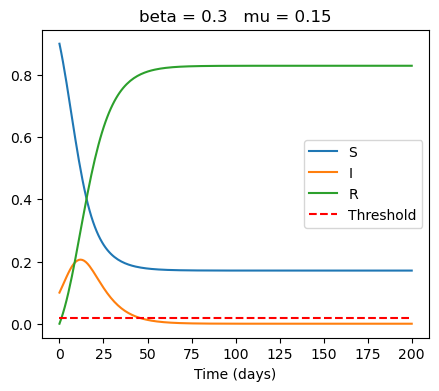

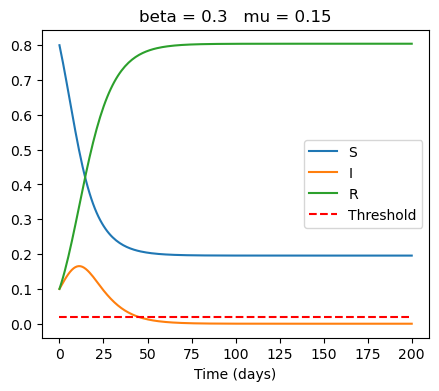

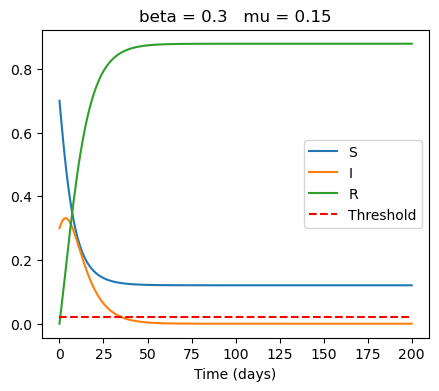

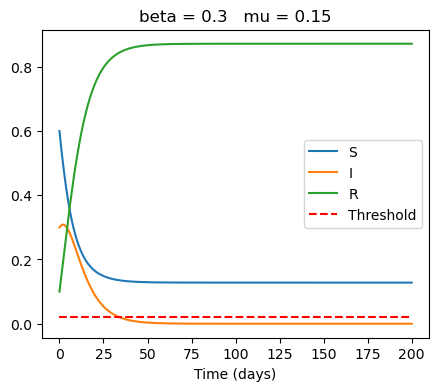

In [43]:
mu = 0.15
beta = 0.3
sir_0_array = [[0.9, 0.1, 0], [0.8, 0.1, 0.1], [0.7, 0.3, 0], [0.6, 0.3, 0.1]]

for sir_0 in sir_0_array:
    sir_int = solve_ivp(fun = mySIR, t_span = interval, y0 = sir_0, args = (beta, mu), t_eval = np.linspace(interval[0],interval[1], timesteps))

    # Plot the curves
    fig, ax = plt.subplots(dpi = 100, figsize = (5,4))
    curves = ax.plot(sir_int.t, sir_int.y.T, label = ['S', 'I', 'R'])

    # Plot epidemic threshold
    threshold = ax.plot(sir_int.t, [0.02]*len(sir_int.t), "r--", label = "Threshold")
    ax.set_title("beta = {}   mu = {}".format(beta, mu))
    ax.set_xlabel("Time (days)")
    ax.legend()

This model never reaches an endemic state, regadless the fixed parameters values and the initial size of the compartments. The epidemic can more or less long-lasting and have a higher or a lower amplitude, but the proportion of infectious people always decay to I = 0. 

If we represent the phase space of the variables *S* and *I* (mu = 0.15 ; beta = 0.3), we observe that for every initial condition, the phase plane orbit gets to a stable point where I = 0. This demonstrates that there are no possible endemic states.

Phase plane was represented using PPLANE Java software.

<img src="./media/pplane_b=0.3_m=0.151024_1.jpg" width = 600>

4. Fix initial conditions and change parameters staying above the epidemic
threshold. What is the maximum incidence of the disease? How does the
maximum incidence and its time of occurrence change with the parameters?

We can identify the maximum incidence for this model by calculating *dI/dt* = 0. When this condition occurs, the number of Infected individuals neither increases nor decreases.

\begin{split}\begin{aligned}
\frac{dI}{dt} & = \beta I S - \mu I = 0\\
\ &(\beta S - \mu) I = 0\\
\end{aligned}\end{split}
Therefore, I' = 0 in the following situations:
\begin{split}\begin{aligned}
\  & I = 0   \\ & S = \mu / \beta \\
\end{aligned}\end{split}

Considering *I* = 0 correspond to a non-epidemic state, we can conclude that the maximum incidence for this model is achieved when *S* = mu / beta. The plots below confirm this, so that when *S* = mu / beta (dashed yellow line), the maximum value of *I* is achieved (dashed red line).

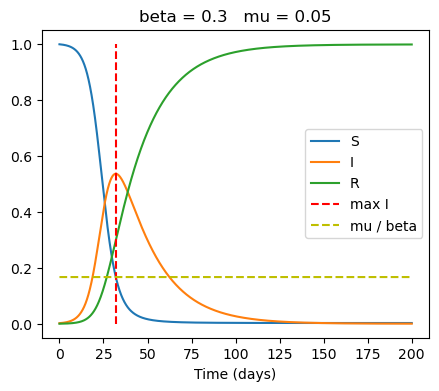

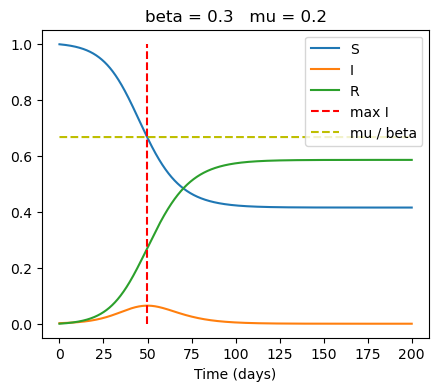

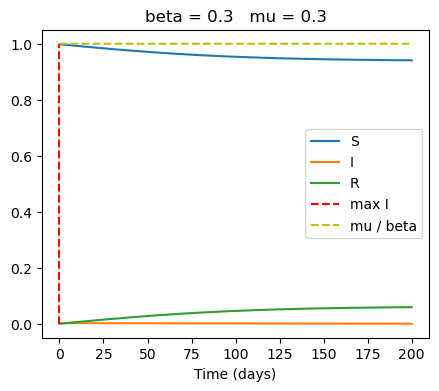

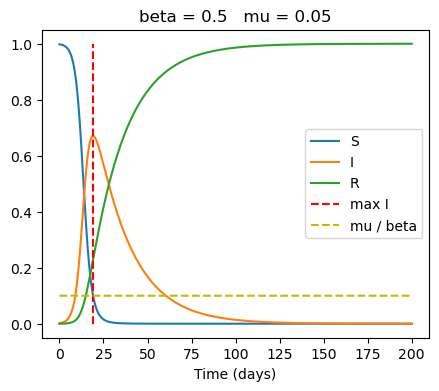

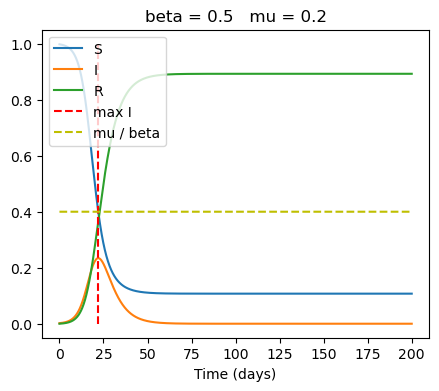

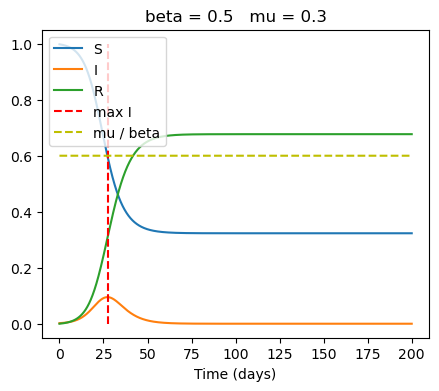

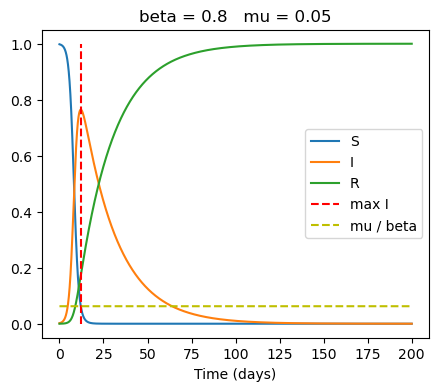

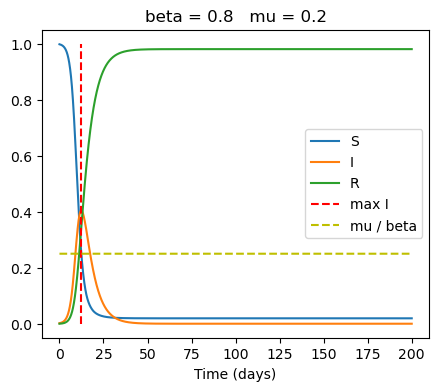

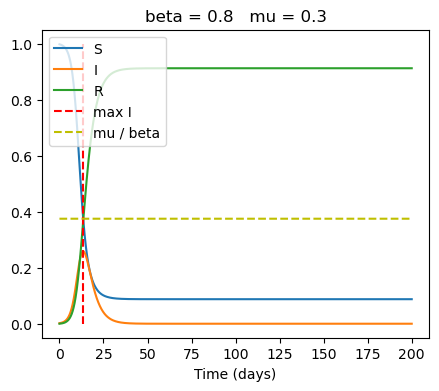

In [46]:
sir_0 = [0.998, 0.002, 0]
beta_list = [0.3, 0.5, 0.8]
mu_list = [0.05, 0.2, 0.3]
for beta in beta_list:
    for mu in mu_list:
        sir_int = solve_ivp(fun = mySIR, t_span = interval, y0 = sir_0, args = (beta, mu), t_eval = np.arange(interval[0],interval[1], 0.01))

        # Plot the curves
        fig, ax = plt.subplots(dpi = 100, figsize = (5,4))
        curves = ax.plot(sir_int.t, sir_int.y.T, label = ['S', 'I', 'R'])

        # Plot maximum point
        mu_beta = mu/beta
        max_t = sir_int.t[np.where(sir_int.y[1] == sir_int.y[1].max())[0][0]]       # Find t for the máximum I value
        
        max_line = ax.plot([max_t]*10, np.linspace(0, 1, 10), "r--", label = "max I")
        mu_beta_line = ax.plot(sir_int.t, [mu_beta]*len(sir_int.t), "y--", label = "mu / beta")
        ax.set_title("beta = {}   mu = {}".format(beta, mu))
        ax.set_xlabel("Time (days)")
        ax.legend()


5. Fix initial conditions and the value of the epidemic threshold, and change
b and m with this condition. Do you see differences in the trajectories? Give a
qualitative interpretation to the role of different parameters.

In view of the plots made in exercises 2 and 4 for different parameter values, we can reach the same conclussions that were already proposed in exercise 2:
- Transmission rate (beta) regulates  the velocity at which Infective compartment grows, making the curve wider or narrower and what defines the time of occurence of the epidemic. Low beta values produce a slowly-growing and long-lasting Infective curve, while high values produce a punctual narrow peak.
- Recovery rate (mu) regulates the amplitue of the Infective curve, the lower the recovery rate, the higher the amplitude. When mu is low, infective people remain infective for a longer period, thus producing new infections.